In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(r"E:\VS code\datasets\titanic\train.csv")

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


As we cannot check all the missing value with this we can use seaborn for finding the features with most missing values and proceed further

<Axes: >

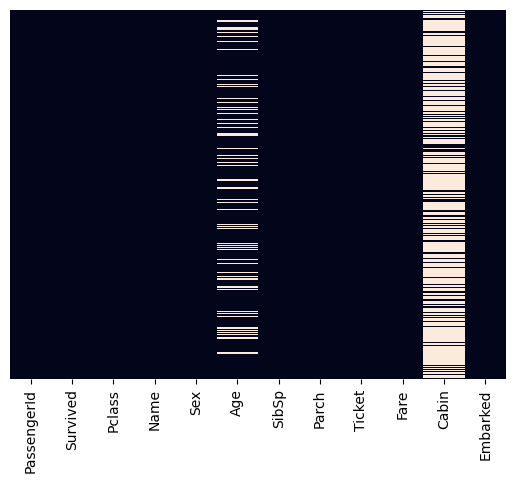

In [5]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

As we can see that there are missing values only on the features Age , Cabin. Age is little less missing values compared to 
Cabin and then it can be used with further analysis but cabin is having to much missing values so it is bettwer to drop it.

<Axes: xlabel='Survived', ylabel='count'>

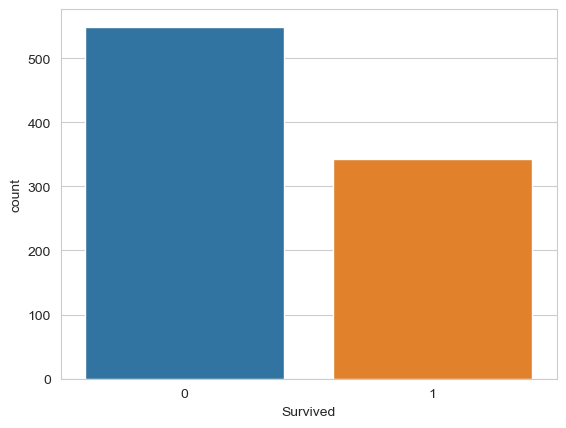

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=df_train)

we can say that more than 500 people have not survived and only about 300 people survived

<Axes: xlabel='Survived', ylabel='count'>

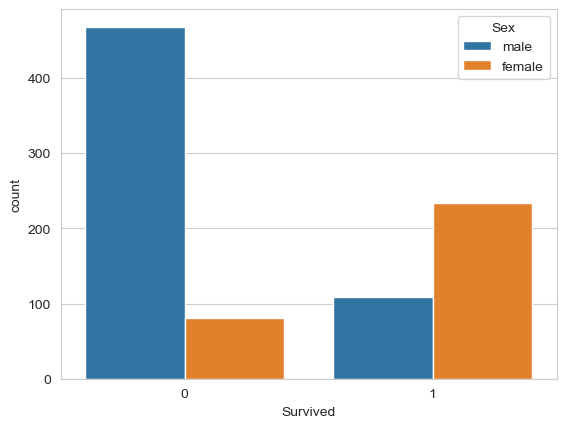

In [7]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=df_train)

With this graph we can see that about less than 100 female and more than 450 male have not survived and then about 100 male
and 200 female have survived and with this we can say  that female survived more compared to male in titanic

<Axes: xlabel='Pclass', ylabel='count'>

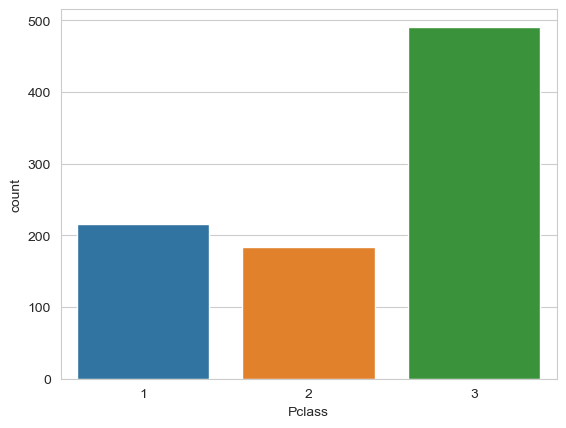

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='Pclass',data=df_train)

So according to the graph the passengers classes or like about 210 first class, 180 second class , 490 third class in the titanic

<Axes: xlabel='Survived', ylabel='count'>

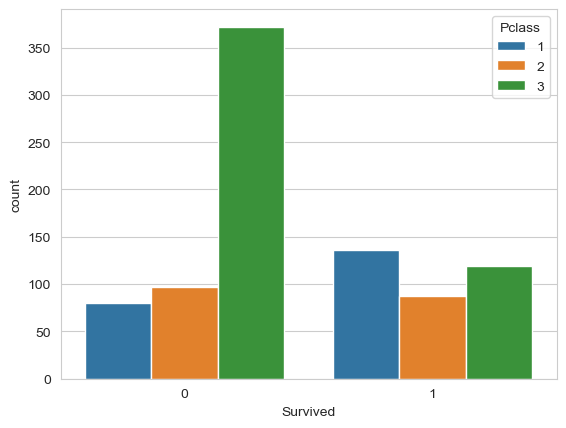

In [9]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=df_train)

Let us say that,
    blue - First Class
    orange - Middle Class
    green - Economic Class
    
With the graph we can say that about 75 First class , about 95 Middle Class,nearly 400 Economic Class pasenegers has 
not survied and about 130 First Class ,about 80 Middle Class ,abot 110 Economic Class survived .

with this we can say that considering the Passenger classes middle class passengers survived less compared to Economic Class.

C:\Users\Admin\AppData\Local\Temp\ipykernel_17608\2199414189.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'].dropna(),kde=False,color="darkred",bins=40)


<Axes: xlabel='Age'>

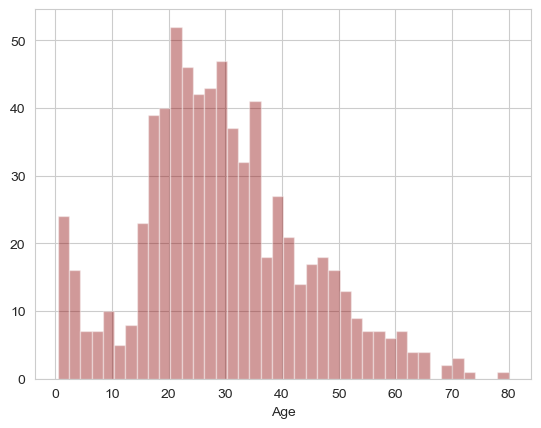

In [10]:
sns.distplot(df_train['Age'].dropna(),kde=False,color="darkred",bins=40)

With this graph we can see that from around 19 to 35 aged passengers are maximum and elderly people are minimum  

<Axes: xlabel='SibSp', ylabel='count'>

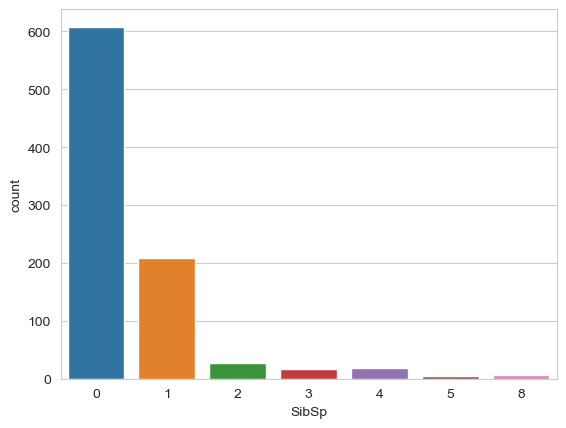

In [11]:
sns.countplot(x='SibSp',data=df_train)


We can see that about 600 people didnt come to ship with their siblings or their partner and about 200 came with their partner and all 90 others came with their familes

<Axes: >

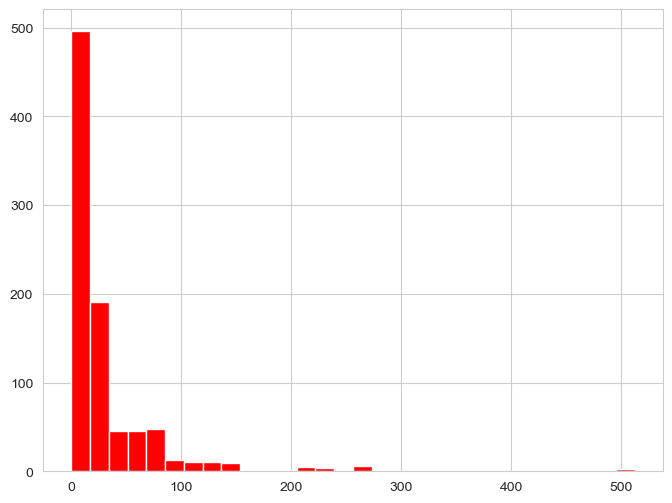

In [12]:
df_train['Fare'].hist(color='red',bins=30,figsize=(8,6))

<Axes: xlabel='Pclass', ylabel='Age'>

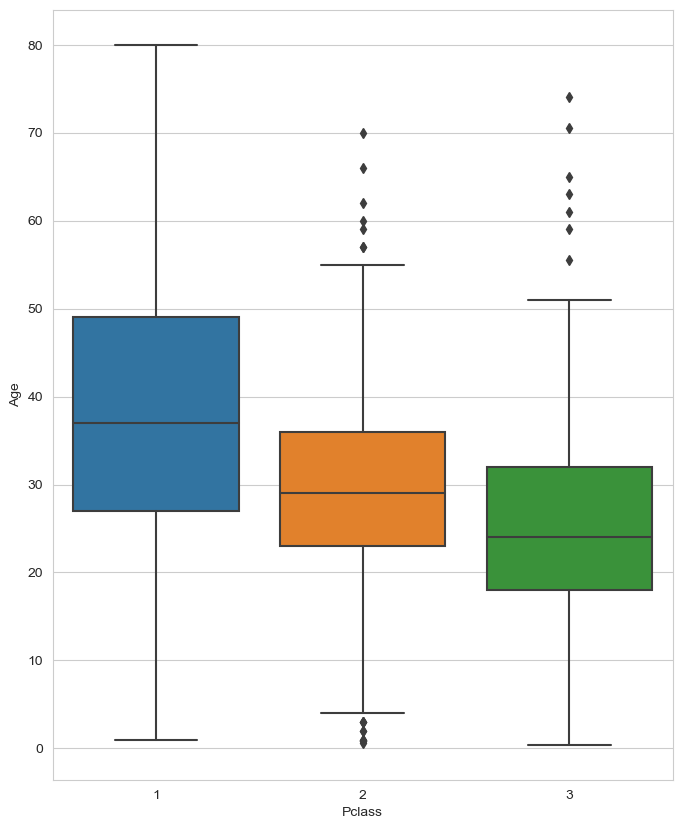

In [13]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Pclass',y='Age',data=df_train)

Average Age of the First class is around 37 and the average age for middle class is around 29 and the average age for third class is around 25
with help of this we can fill the missing values. 

In [14]:
def missing_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [15]:
df_train['Age'] = df_train[['Age','Pclass']].apply(missing_age,axis=1)

<Axes: >

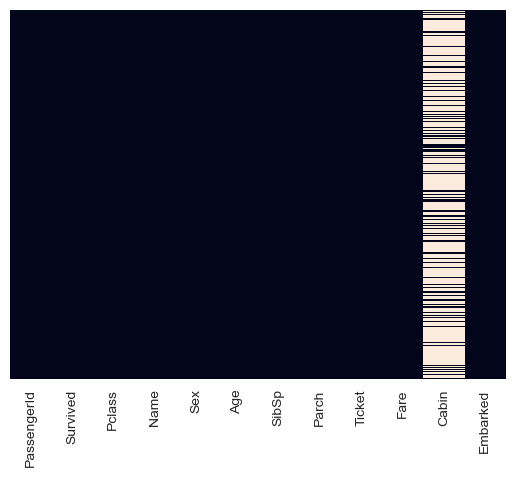

In [16]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

as we can see that all the age has been replaced with the average age according to their Passenger class and filled the missing values in the age

In [17]:
df_train.drop('Cabin',axis=1,inplace=True)

<Axes: >

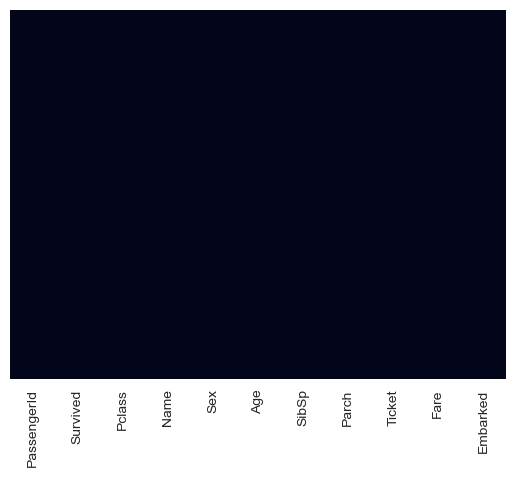

In [18]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [19]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df_train.dropna(inplace=True)

In [21]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.172295,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.156423,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df_train.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17608\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032588,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.055433,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.397594,0.081656,0.016824,-0.548193
Age,0.032588,-0.055433,-0.397594,1.000000,-0.242031,-0.173009,0.117387
SibSp,-0.057686,-0.034040,0.081656,-0.242031,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.173009,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.117387,0.160887,0.217532,1.000000


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
df_train['Sex']= label_encoder.fit_transform(df_train['Sex'])
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])

In [25]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int32  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 76.4+ KB


In [27]:
df_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [28]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
x=df_train[["Sex","Age","SibSp","Parch"]]
y=df_train['Survived']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
acc=accuracy_score(y_test,y_pred)
acc

0.8370786516853933

In [37]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[106,  16],
       [ 13,  43]], dtype=int64)

In [38]:
classreport=classification_report(y_test,y_pred)
classreport

'              precision    recall  f1-score   support\n\n           0       0.89      0.87      0.88       122\n           1       0.73      0.77      0.75        56\n\n    accuracy                           0.84       178\n   macro avg       0.81      0.82      0.81       178\nweighted avg       0.84      0.84      0.84       178\n'

In [39]:
print('              precision    recall  f1-score   support\n\n           0       0.89      0.87      0.88       122\n           1       0.73      0.77      0.75        56\n\n    accuracy                           0.84       178\n   macro avg       0.81      0.82      0.81       178\nweighted avg       0.84      0.84      0.84       178\n')

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       122
           1       0.73      0.77      0.75        56

    accuracy                           0.84       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.84      0.84      0.84       178



In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc=DecisionTreeClassifier()

In [42]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred1=dtc.predict(x_test)
y_pred1

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [44]:
acc1=accuracy_score(y_test,y_pred1)
acc1

0.8258426966292135

In [45]:
for clf in (lr,dtc):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,"Accuracy:",accuracy_score(y_test,y_pred))
    print(clf.__class__.__name__,"Confusion Matrix",confusion_matrix(y_test,y_pred))
    print(clf.__class__.__name__,"Classification Report:\n",classification_report(y_test,y_pred))

LogisticRegression Accuracy: 0.8370786516853933
LogisticRegression Confusion Matrix [[106  16]
 [ 13  43]]
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       122
           1       0.73      0.77      0.75        56

    accuracy                           0.84       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.84      0.84      0.84       178

DecisionTreeClassifier Accuracy: 0.8202247191011236
DecisionTreeClassifier Confusion Matrix [[106  16]
 [ 16  40]]
DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       122
           1       0.71      0.71      0.71        56

    accuracy                           0.82       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.82      0.82      0.82       178

